# Imports

In [2]:
%load_ext autoreload
%autoreload 2

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
cd /content/drive/MyDrive/brewing/

/content/drive/.shortcut-targets-by-id/1wGrW3Um-cH0PiGtcEam-_30m09KHmtTm/brewing


In [8]:
from dataset.dataset import DataSet

In [ ]:
!pip install scikit-fda

In [10]:
import skfda  
import pandas as pd

In [11]:
def cluster_fda(table,num_clusters,marca):
  data_fda=skfda.FDataGrid(table)
  kmeans = skfda.ml.clustering.KMeans(n_clusters=num_clusters)
  kmeans.fit(data_fda)
  clusters_df=pd.DataFrame(kmeans.labels_,index=table.index)
  table_cluster=table.merge(clusters_df,how='inner',right_index=True, left_index=True)
  table_cluster.rename(columns={0:f'cluster_{marca}'},inplace=True)
  return table_cluster

In [12]:
def table_from_df(data,beer_list = ["Marca_20","Cupo_3","CapacidadEnvase_9"], var='Volumen',all_volumens =False):
  if not all_volumens:
    mask_marca = (data["Marca2"]==beer_list[0])
    mask_cupo =  (data["Cupo2"]==beer_list[1])
    mask_capac = (data["CapacidadEnvase2"]==beer_list[2])
    mask = (mask_marca & mask_cupo & mask_capac)
    data_filter = data[mask]
  else:
    data_filter = data
  clientes = pd.DataFrame(data=list(data["Cliente"].unique()),columns=['Cliente'])
  table = pd.pivot_table(data=data_filter, values=var,
                         index ='Cliente', columns='date')
  table = clientes.merge(table,how = 'left', left_on='Cliente', right_index=True)
  table.fillna(0, inplace=True)
  return table

In [13]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
def plot_mean_clusters(tabclu_o):
  tabclu=tabclu_o.copy()
  columns = list(tabclu.columns)
  columns.pop()
  columns.append('cluster')
  tabclu.columns =columns
  clusters=sorted(list(tabclu.cluster.value_counts().index.array))
  sns.set_style("darkgrid")
  fig, ax=plt.subplots(figsize=(9,7))
  for cluster in clusters:
    tab_c=tabclu[tabclu.cluster==cluster].copy()
    tab_c.drop(columns=['cluster','Cliente'],inplace=True)
    fda_tab_c=skfda.FDataGrid(tab_c)
    mean_periodos=skfda.exploratory.stats.mean(fda_tab_c)
    lab='Cluster '+str(cluster)
    ax.plot(mean_periodos.data_matrix[0,:,0],'-o',label=lab)
  tabclu.drop(columns=['cluster','Cliente'],inplace=True)
  fda_all=skfda.FDataGrid(tabclu)
  mean_all=skfda.exploratory.stats.mean(fda_all)
  ax.plot(mean_all.data_matrix[0,:,0],'--o',label='All data')
  dates=[str(x) for x in tabclu.columns]
  ax.set_xticks(np.arange(len(dates)))
  ax.set_xticklabels(dates,rotation=90)
  plt.title('Comportamiento Volumenes')
  plt.legend()
  plt.show()


def plot_inertias(tabla):
  list_inertias = []
  num_clusters_list =np.arange(2,15)
  for num_clusters in num_clusters_list:
    data_fda=skfda.FDataGrid(tabla.copy())
    kmeans = skfda.ml.clustering.KMeans(n_clusters=num_clusters)
    kmeans.fit(data_fda)
    list_inertias.append(kmeans.inertia_)
  plt.plot(num_clusters_list,list_inertias,'*-')

# Analysis

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/brewing/data/Input2_clientes_venta.csv',sep=';')
test = pd.read_csv('/content/drive/MyDrive/brewing/data/Input3_clientes_test.csv',sep=';')
train['date']=(train["Año"].astype('str') + '/' + train["Mes"].astype('str')).astype("datetime64")

In [16]:
ds = DataSet()

## Marca 1

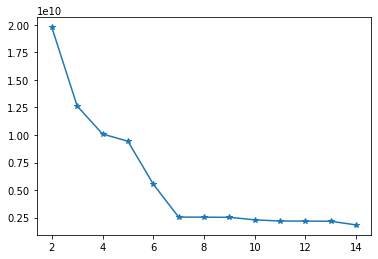

In [ ]:
tabla = table_from_df(train, beer_list = ds.BEERSDIC['beer_1'])
plot_inertias(tabla)

*** Select 7 clusters***

In [ ]:
tab_cluster = cluster_fda(tabla,7,'marca_1')
print(tab_cluster.cluster_marca_1.value_counts())

2    3805
6    2640
1    2620
3    2362
4    2230
5    1789
0    1564
Name: cluster_marca_1, dtype: int64


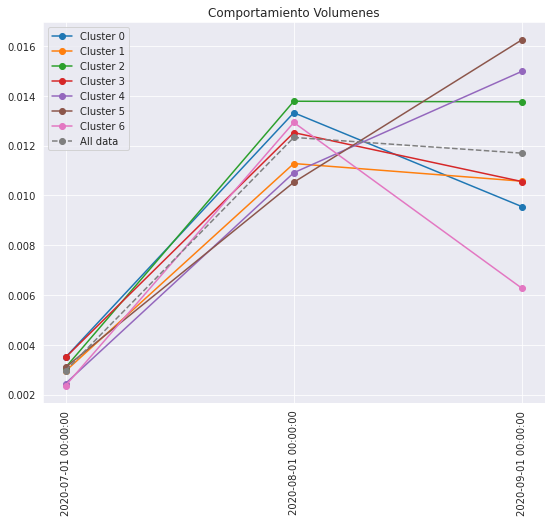

In [ ]:
plot_mean_clusters(tab_cluster)

## Marca 2

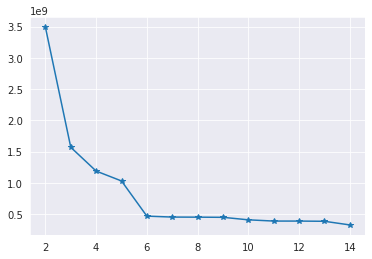

In [ ]:
tabla = table_from_df(train, beer_list = ds.BEERSDIC['beer_2'])
plot_inertias(tabla)

*** Select 6 clusters***

In [ ]:
tab_cluster = cluster_fda(tabla,6,'marca_2')
print(tab_cluster.cluster_marca_2.value_counts())

5    4021
1    3336
2    3092
4    2488
3    2157
0    1916
Name: cluster_marca_2, dtype: int64


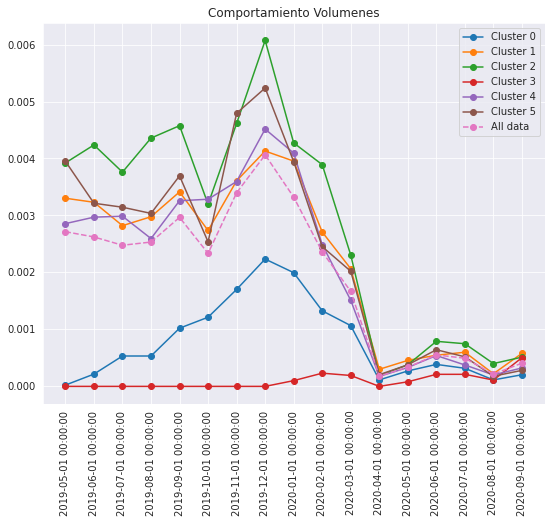

In [ ]:
plot_mean_clusters(tab_cluster)

## Marca 3

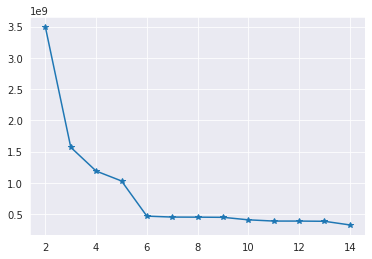

In [ ]:
tabla = table_from_df(train, beer_list = ds.BEERSDIC['beer_3'])
plot_inertias(tabla)

*** Select 6 clusters***

In [ ]:
tab_cluster = cluster_fda(tabla,6,'marca_3')
print(tab_cluster.cluster_marca_3.value_counts())

5    4021
1    3336
2    3092
4    2488
3    2157
0    1916
Name: cluster_marca_3, dtype: int64


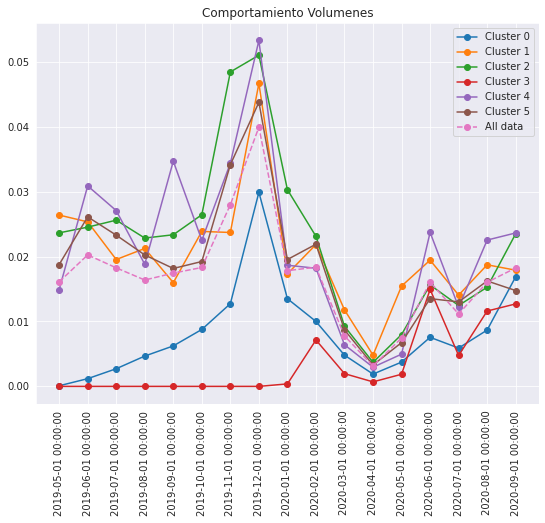

In [ ]:
plot_mean_clusters(tab_cluster)

## Marca 4

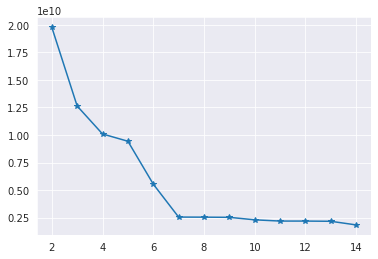

In [ ]:
tabla = table_from_df(train, beer_list = ds.BEERSDIC['beer_4'])
plot_inertias(tabla)

*** Select 7 clusters***

In [ ]:
tab_cluster = cluster_fda(tabla,7,'marca_4')
print(tab_cluster.cluster_marca_4.value_counts())

2    3805
6    2641
1    2620
3    2362
4    2230
5    1788
0    1564
Name: cluster_marca_4, dtype: int64


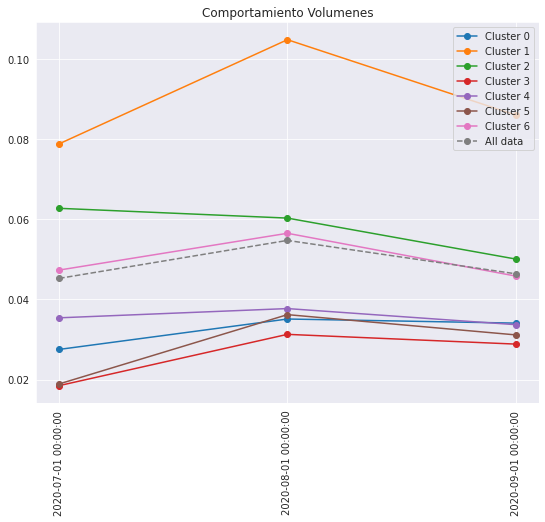

In [ ]:
plot_mean_clusters(tab_cluster)

## Marca 5

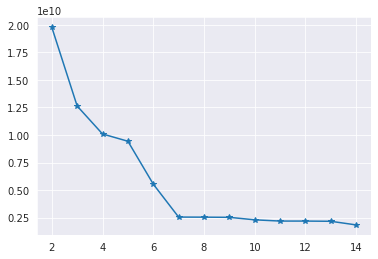

In [ ]:
tabla = table_from_df(train, beer_list = ds.BEERSDIC['beer_5'])
plot_inertias(tabla)

*** Select 7 clusters***

In [ ]:
tab_cluster = cluster_fda(tabla,7,'marca_5')
print(tab_cluster.cluster_marca_5.value_counts())

2    3806
6    2641
1    2620
3    2362
4    2229
5    1788
0    1564
Name: cluster_marca_5, dtype: int64


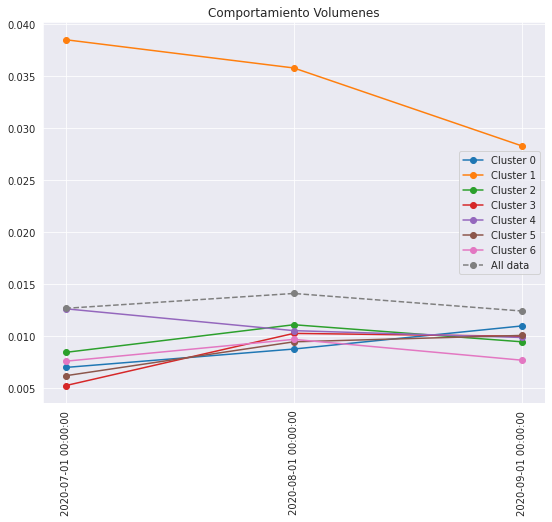

In [ ]:
plot_mean_clusters(tab_cluster)

## Alls Volumens

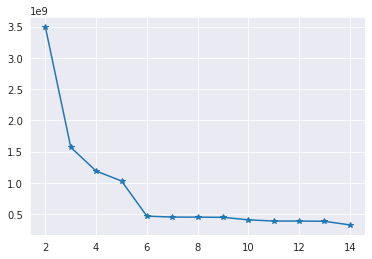

In [ ]:
tabla = table_from_df(train, all_volumens=True)
plot_inertias(tabla)

*** Select 6 clusters***

In [ ]:
tab_cluster = cluster_fda(tabla,6,'all')
print(tab_cluster.cluster_all.value_counts())

5    4021
1    3337
2    3092
4    2487
3    2157
0    1916
Name: cluster_all, dtype: int64


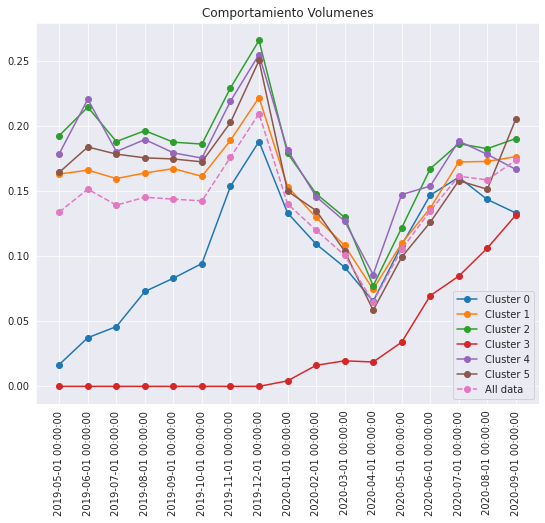

In [ ]:
plot_mean_clusters(tab_cluster)

# Model 

In [14]:
import statsmodels.api as sm
train = pd.read_csv('/content/drive/MyDrive/brewing/data/Input2_clientes_venta.csv',sep=';')
test = pd.read_csv('/content/drive/MyDrive/brewing/data/Input3_clientes_test.csv',sep=';')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [56]:
import matplotlib.pyplot as plt

In [52]:
train['date']=(train["Año"].astype('str') + '/' + train["Mes"].astype('str')).astype("datetime64")
n_clusters_list = [7,6,6,7,7,6]
list_tables = []
for index, beer in enumerate(ds.BEERSDIC.keys()):
  tabla = table_from_df(train, beer_list = ds.BEERSDIC[beer])
  tabla.columns = [ f'{str(x)[:7]}_{beer}' for x in tabla.columns.ravel()]
  n_clu = n_clusters_list[index]
  tab_cluster = cluster_fda(tabla,n_clu,beer)
  list_tables.append(tab_cluster)

tabla = table_from_df(train,all_volumens=True)
tabla.columns = [ f'{str(x)[:7]}_all' for x in tabla.columns.ravel()]
n_clu = n_clusters_list[-1]
tab_cluster = cluster_fda(tabla,n_clu,'all')
list_tables.append(tab_cluster)
tab = pd.concat(list_tables, axis=1)


In [53]:
clientes_info = pd.read_csv('/content/drive/MyDrive/brewing/data/Input1_clientes_estructura.csv', sep=';')
tab = tab.merge(clientes_info, how='left', left_index=True, right_on='Cliente')
tab.set_index('Cliente_all', inplace=True)

In [51]:
tab

,Cliente_beer_1,2020-07_beer_1,2020-08_beer_1,2020-09_beer_1,cluster_beer_1,Cliente_beer_2,2019-05_beer_2,2019-06_beer_2,2019-07_beer_2,2019-08_beer_2,2019-09_beer_2,2019-10_beer_2,2019-11_beer_2,2019-12_beer_2,2020-01_beer_2,2020-02_beer_2,2020-03_beer_2,2020-04_beer_2,2020-05_beer_2,2020-06_beer_2,2020-07_beer_2,2020-08_beer_2,2020-09_beer_2,cluster_beer_2,Cliente_beer_3,2019-05_beer_3,2019-06_beer_3,2019-07_beer_3,2019-08_beer_3,2019-09_beer_3,2019-10_beer_3,2019-11_beer_3,2019-12_beer_3,2020-01_beer_3,2020-02_beer_3,2020-03_beer_3,2020-04_beer_3,2020-05_beer_3,2020-06_beer_3,2020-07_beer_3,2020-08_beer_3,2020-09_beer_3,cluster_beer_3,Cliente_beer_4,2020-07_beer_4,2020-08_beer_4,2020-09_beer_4,cluster_beer_4,Cliente_beer_5,2020-07_beer_5,2020-08_beer_5,2020-09_beer_5,cluster_beer_5,Cliente_all,2019-05_all,2019-06_all,2019-07_all,2019-08_all,2019-09_all,2019-10_all,2019-11_all,2019-12_all,2020-01_all,2020-02_all,2020-03_all,2020-04_all,2020-05_all,2020-06_all,2020-07_all,2020-08_all,2020-09_all,cluster_all
0,10,0.000000,0.000000,0.000000,6,10,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,5,10,0.000000,0.000000,0.0,0.000000,0.037410,0.018705,0.000000,0.018705,0.018705,0.187048,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,5,10,0.136927,0.000000,0.0,6,10,0.019561,0.000000,0.000000,6,10,0.170436,0.185416,0.193333,0.295786,0.169892,0.215406,0.526851,0.381077,0.278705,0.151799,0.315149,0.000000,0.138971,0.175659,0.094749,0.070037,0.088957,5
1,12,0.000000,0.000000,0.000000,6,12,0.086938,0.086938,0.065203,0.108672,0.043469,0.0,0.108672,0.043469,0.065203,0.086938,0.021734,0.0,0.0,0.0,0.0,0.0,0.0,5,12,0.000000,0.018705,0.0,0.018705,0.018705,0.018705,0.018705,0.000000,0.018705,0.018705,0.0,0.0,0.000000,0.000000,0.0,0.009352,0.0,5,12,0.000000,0.000000,0.0,6,12,0.000000,0.000000,0.000000,6,12,0.078781,0.080040,0.074975,0.080753,0.060629,0.094768,0.073993,0.060738,0.069462,0.066987,0.033004,0.000000,0.000000,0.000000,0.000000,0.033293,0.035302,5
2,14,0.000000,0.000000,0.016861,6,14,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,5,14,0.004676,0.000000,0.0,0.000000,0.000000,0.018705,0.018705,0.018705,0.000000,0.018705,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,5,14,0.000000,0.000000,0.0,6,14,0.000000,0.000000,0.000000,6,14,0.133138,0.127245,0.150718,0.260646,0.156927,0.185308,0.089346,0.288905,0.148666,0.177511,0.089901,0.057296,0.083806,0.122515,0.143509,0.114408,0.095279,5
3,15,0.016861,0.033721,0.016861,6,15,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,5,15,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,5,15,0.000000,0.000000,0.0,6,15,0.000000,0.000000,0.000000,6,15,0.135053,0.124832,0.140813,0.147282,0.135168,0.102029,0.177572,0.376393,0.232691,0.094018,0.136676,0.130645,0.118742,0.116502,0.108218,0.107843,0.056435,5
4,18,0.016861,0.016861,0.000000,6,18,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,5,18,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004676,0.0,0.0,0.004676,0.009352,0.0,0.000000,0.0,5,18,0.000000,0.000000,0.0,6,18,0.000000,0.000000,0.000000,6,18,0.171278,0.183576,0.185423,0.119059,0.073984,0.122487,0.378492,0.503414,0.104325,0.103385,0.076217,0.164362,0.099855,0.162396,0.103542,0.093441,0.102417,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17005,20529,0.000000,0.000000,0.000000,3,20529,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,

In [54]:
columns_date = [col for col in tab.columns if col[0]=='2']
tab[columns_date] = (tab[columns_date] > 0)*1
tab.drop(columns=['Cliente_beer_1','Cliente_beer_2','Cliente_beer_3','Cliente_beer_4','Cliente_beer_5'],inplace=True)
tab

,2020-07_beer_1,2020-08_beer_1,2020-09_beer_1,cluster_beer_1,2019-05_beer_2,2019-06_beer_2,2019-07_beer_2,2019-08_beer_2,2019-09_beer_2,2019-10_beer_2,2019-11_beer_2,2019-12_beer_2,2020-01_beer_2,2020-02_beer_2,2020-03_beer_2,2020-04_beer_2,2020-05_beer_2,2020-06_beer_2,2020-07_beer_2,2020-08_beer_2,2020-09_beer_2,cluster_beer_2,2019-05_beer_3,2019-06_beer_3,2019-07_beer_3,2019-08_beer_3,2019-09_beer_3,2019-10_beer_3,2019-11_beer_3,2019-12_beer_3,2020-01_beer_3,2020-02_beer_3,2020-03_beer_3,2020-04_beer_3,2020-05_beer_3,2020-06_beer_3,2020-07_beer_3,2020-08_beer_3,2020-09_beer_3,cluster_beer_3,2020-07_beer_4,2020-08_beer_4,2020-09_beer_4,cluster_beer_4,2020-07_beer_5,2020-08_beer_5,2020-09_beer_5,cluster_beer_5,2019-05_all,2019-06_all,2019-07_all,2019-08_all,2019-09_all,2019-10_all,2019-11_all,2019-12_all,2020-01_all,2020-02_all,2020-03_all,2020-04_all,2020-05_all,2020-06_all,2020-07_all,2020-08_all,2020-09_all,cluster_all,Cliente,Regional2,Gerencia2,SubCanal2,Categoria,Nevera
Cliente_all,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,5,1,0,0,6,1,0,0,6,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,5,0,NaN,NaN,NaN,NaN,NaN
12,0,0,0,6,1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,5,0,1,0,1,1,1,1,0,1,1,0,0,0,0,0,1,0,5,0,0,0,6,0,0,0,6,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,5,1,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,0.0
14,0,0,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,5,0,0,0,6,0,0,0,6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,5,2,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,0.0
15,1,1,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,6,0,0,0,6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,5,3,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,0.0
18,1,1,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,5,0,0,0,6,0,0,0,6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,5,4,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20529,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,1,0,3,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,3,17005,Regional 1,Gerencia_10,Subcanal_1,Categoria_3,1.0
20567,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,3,0,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,17006,Regional 1,Gerencia_2,Subcanal_3,Categoria_2,0.0
20569,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,3,1,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,17007,Regional 1,Gerencia_2,Subcanal_4,Categoria_2,0.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, auc, accuracy_score
from sklearn.model_selection import GridSearchCV
tab = tab.loc[test.Cliente.values,:].copy()
i = 1
for marca, beer in zip(test.columns[1:],ds.BEERSDIC.keys()):
  name_columns_features_beer = [x for x in tab.columns if ((beer in x ) and ('cluster' not in x)) ]
  name_columns_features_all  = [x for x in tab.columns if (('_all' in x ) and ('cluster' not in x))]
  if ((i==1) or (i==4) or (i==5)):
    name_columns_categ = [x for x in tab.columns if (f'cluster_{beer}'  in x)] + ['Regional2', 'Gerencia2','SubCanal2', 'Categoria', 'Nevera']
    name_columns_features_train = name_columns_features_beer[:-1]  + name_columns_categ + name_columns_features_all[:-1]
    name_columns_features_test = name_columns_features_beer[1:] + name_columns_categ + name_columns_features_all[1:] 
    param_grid = [{"max_leaf_nodes":[2,3,4,5]}]
    X_train = tab[name_columns_features_train].copy()
    X_train = pd.get_dummies(data=X_train, columns=name_columns_categ)
    X_test = tab[name_columns_features_test].copy()
    X_test = pd.get_dummies(data=X_test, columns=name_columns_categ)
    print(X_train.columns)
    y = tab[f'2020-09_{beer}'].values
  else:
    name_columns_categ = [x for x in tab.columns if (f'cluster_{beer}'  in x)] + ['Regional2', 'Gerencia2','SubCanal2', 'Categoria', 'Nevera']
    name_columns_features_train = name_columns_features_beer[:-1] + name_columns_features_all[:-1] + name_columns_categ
    name_columns_features_test = name_columns_features_beer[1:] + name_columns_features_all[1:] + name_columns_categ
    X_train = tab[name_columns_features_train].copy()
    X_train = pd.get_dummies(data=X_train, columns=name_columns_categ)
    X_test = tab[name_columns_features_test].copy()
    X_test = pd.get_dummies(data=X_test, columns=name_columns_categ)
    print(X_train.columns)
    y = tab[f'2020-09_{beer}'].values
  model = RandomForestClassifier()
  param_grid = [{"max_depth":[20,25,30],
               "max_features":[20,25],
               "max_leaf_nodes":[ 20, 30, 25],
               "n_estimators":[25, 20, 30 ]}]
  grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, return_train_score=True, scoring='roc_auc')
  grid_search.fit(X_train, y)
  plt.plot(grid_search.best_estimator_.feature_importances_)
  plt.show()
  print('***********************************************************************')
  y_pred = grid_search.best_estimator_.predict_proba(X_train)[:,1]
  test[f'{marca}'] = grid_search.best_estimator_.predict_proba(X_test)[:,1]
  i +=1

Index(['2020-07_beer_1', '2020-08_beer_1', '2019-05_all', '2019-06_all',
       '2019-07_all', '2019-08_all', '2019-09_all', '2019-10_all',
       '2019-11_all', '2019-12_all', '2020-01_all', '2020-02_all',
       '2020-03_all', '2020-04_all', '2020-05_all', '2020-06_all',
       '2020-07_all', '2020-08_all', 'cluster_beer_1_0', 'cluster_beer_1_1',
       'cluster_beer_1_2', 'cluster_beer_1_3', 'cluster_beer_1_4',
       'cluster_beer_1_5', 'cluster_beer_1_6', 'Regional2_Regional 1',
       'Gerencia2_Gerencia_1', 'Gerencia2_Gerencia_10',
       'Gerencia2_Gerencia_11', 'Gerencia2_Gerencia_2', 'Gerencia2_Gerencia_3',
       'Gerencia2_Gerencia_4', 'Gerencia2_Gerencia_5', 'Gerencia2_Gerencia_6',
       'Gerencia2_Gerencia_7', 'Gerencia2_Gerencia_8', 'Gerencia2_Gerencia_9',
       'SubCanal2_Subcanal_1', 'SubCanal2_Subcanal_10',
       'SubCanal2_Subcanal_11', 'SubCanal2_Subcanal_12',
       'SubCanal2_Subcanal_13', 'SubCanal2_Subcanal_14',
       'SubCanal2_Subcanal_15', 'SubCanal2_Subc

In [86]:
from datetime import datetime
filename = ds.BASEPATH/f'predictions/{datetime.now().strftime("%Y-%m-%d_%H:%M:%S")}.csv'
test.fillna(0,inplace=True)
test.to_csv(filename, index=False)